In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from candlesticks import barplot

In [3]:
nq = pd.read_pickle('data/minute_NQ_cont_non_active_included.pickle')
nq.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-12-01 07:26:00,4818.0,4818.0,4818.0,4818.0,5,4818.0,4
2016-12-01 07:27:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:28:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:29:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:30:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0


In [4]:
nq.describe()

,open,high,low,close,volume,average,barCount
count,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000
mean,6716.392425,6717.406032,6715.376979,6716.394245,265.924575,6716.392849,139.156117
std,747.486336,747.792122,747.182925,747.487357,523.838464,747.487589,266.590693
min,4818.000000,4818.000000,4818.000000,4818.000000,0.000000,4818.000000,0.000000
25%,6058.250000,6059.000000,6057.250000,6058.250000,16.000000,6058.175000,11.000000
50%,6823.500000,6824.750000,6822.250000,6823.500000,59.000000,6823.425000,37.000000
75%,7364.250000,7365.250000,7363.000000,7364.250000,254.000000,7364.225000,134.000000
max,8044.500000,8051.750000,8042.250000,8044.750000,17549.000000,8045.125000,6643.000000


In [5]:
nq.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-12-01 07:26:00,4818.0,4818.0,4818.0,4818.0,5,4818.0,4
2016-12-01 07:27:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:28:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:29:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:30:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0


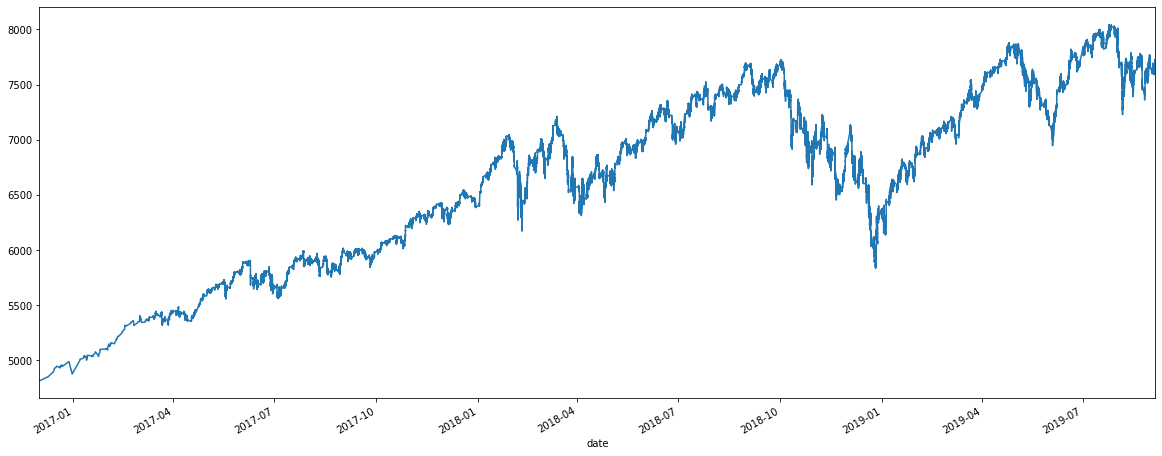

In [6]:
nq.close.plot(figsize=(20,8));

In [7]:
data = pd.DataFrame(nq.close)
data['max'] = data.close.rolling(200).max()
data['min'] = data.close.rolling(200).min()
data['ema'] = data.close.rolling(2000).mean()
#data['mean'] = (data['max'] + data['min']) / 2
#data['indicator'] = (data['close'] - data['mean']) / (data['max'] - data['min'])

data.tail()

,close,max,min,ema
date,,,,
2019-09-04 18:27:00,7695.00,7703.75,7668.25,7652.563250
2019-09-04 18:28:00,7695.00,7703.75,7668.25,7652.593375
2019-09-04 18:29:00,7695.00,7703.75,7668.25,7652.623375
2019-09-04 18:30:00,7697.50,7703.75,7668.25,7652.654500
2019-09-04 18:31:00,7697.25,7703.75,7668.25,7652.685250


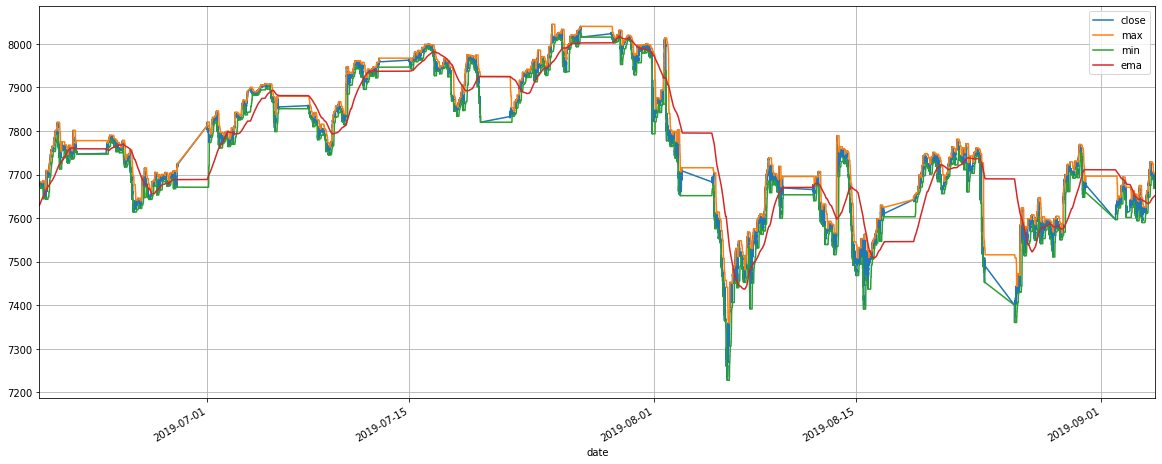

In [8]:
data[-75000:].plot(figsize=(20,8), grid=True);

In [9]:
avg_vol = nq.loc['20190621':].volume.rolling(15).sum().mean()
avg_vol

4957.834123352981

9916.21218117854


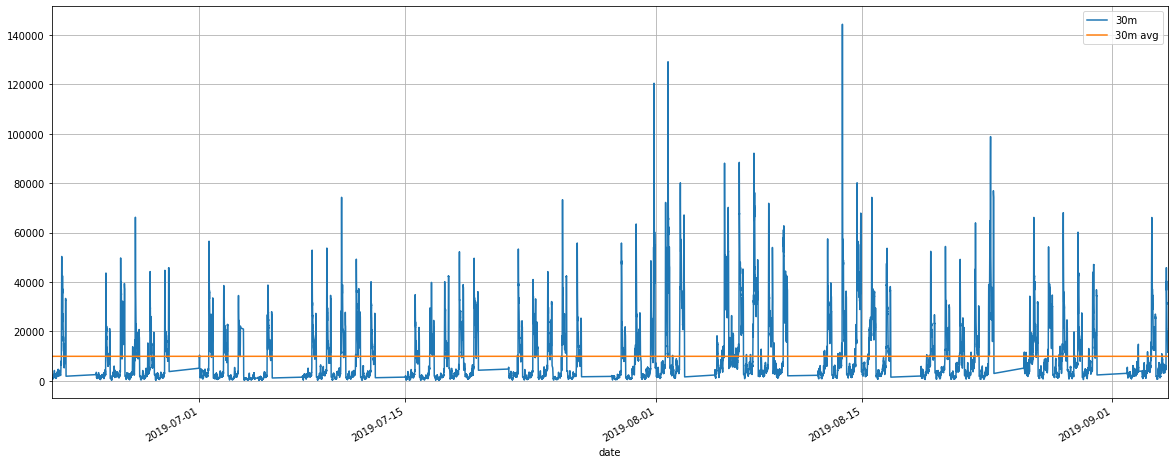

In [10]:
time_int = 30
df = nq.loc['20190621':]
avg = df.volume.rolling(time_int).sum().mean()
volume_df = pd.DataFrame({
    '{}m'.format(time_int): df.volume.rolling(time_int).sum(),
    '{}m avg'.format(time_int): avg,
})
print(avg)
volume_df.plot(figsize=(20, 8), grid=True);

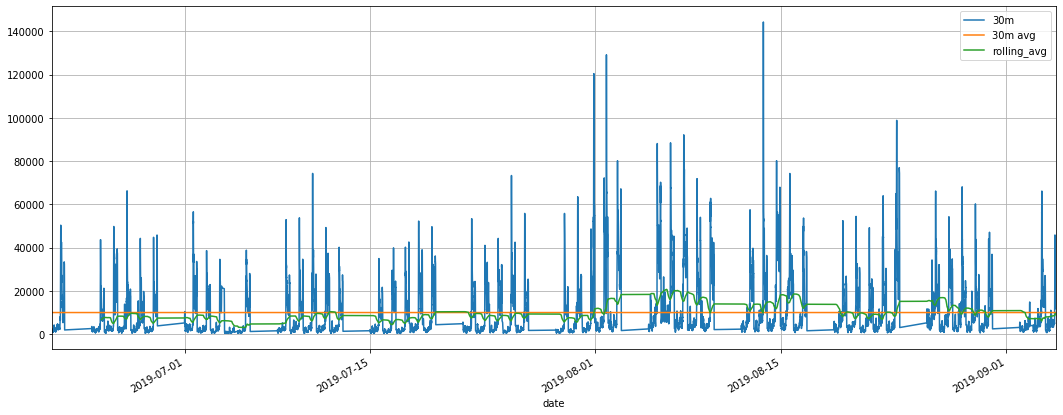

In [11]:
volume_df['rolling_avg'] = volume_df.iloc[:,0].rolling(2400).mean()
volume_df.plot(figsize=(18,7), grid=True);

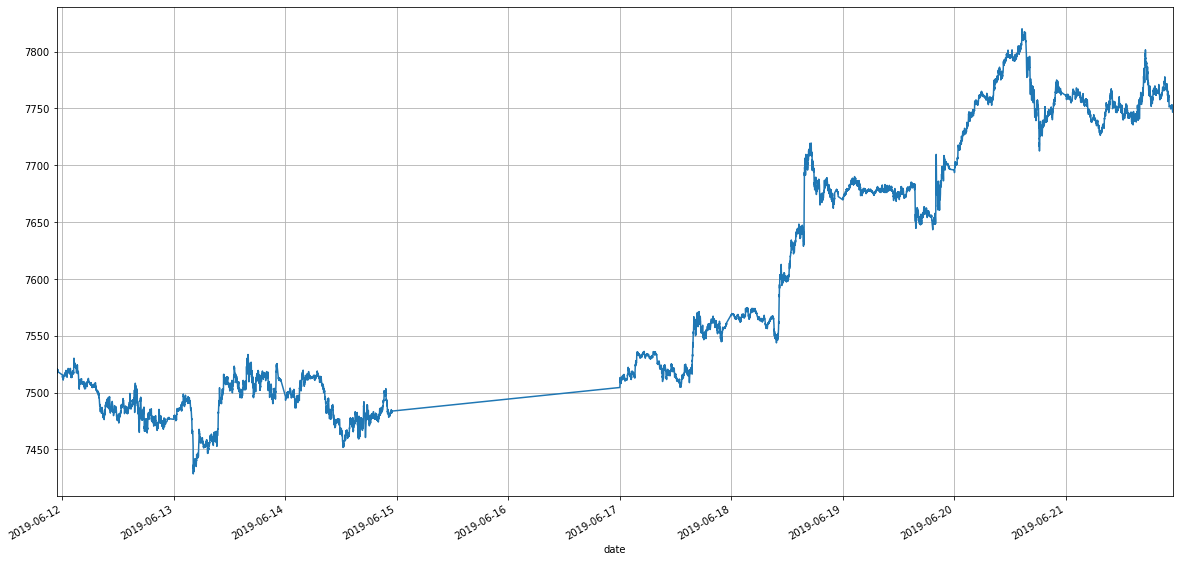

In [12]:
 nq.loc['20190611 22:45:00':'20190621'].close.plot(figsize=(20,10),grid=True);

In [13]:
class VolumeGrouper:
    def __init__(self, avg_vol):
        self.volume = 0
        self.counter = 0
        self.avg_vol = avg_vol
    def group(self, vol):
        self.volume += vol
        if self.volume >= self.avg_vol:
            self.volume -= self.avg_vol
            self.counter += 1
        return self.counter

In [14]:
vol_candles = nq.copy().reset_index()
vol_candles['turnover'] = vol_candles.close * vol_candles.volume
grouper = VolumeGrouper(avg_vol)
vol_candles['label'] = vol_candles.volume.apply(grouper.group)

In [15]:
vol_candles = vol_candles.groupby('label').agg({'date': 'last',
                                  'open': 'first',
                                 'high': 'max',
                                 'low': 'min',
                                 'close': 'last',
                                 'volume': 'sum',
                                'turnover': 'sum'})
vol_candles['avg_price'] = vol_candles.turnover / vol_candles.volume

In [16]:
#vol_candles.set_index('date', inplace=True)

In [17]:
vol_candles.head()

,date,open,high,low,close,volume,turnover,avg_price
label,,,,,,,,
0,2017-05-05 19:25:00,4818.00,5647.00,4818.00,5634.00,4957,27013992.50,5449.665624
1,2017-05-25 04:48:00,5635.00,5758.50,5557.00,5755.75,4958,28133813.25,5674.427844
2,2017-06-02 15:30:00,5754.50,5850.25,5746.75,5839.50,4952,28726236.25,5800.936238
3,2017-06-06 14:47:00,5836.75,5897.75,5832.75,5877.25,4960,29164904.25,5880.021018
4,2017-06-07 15:13:00,5877.50,5900.25,5856.00,5881.50,4960,29169261.50,5880.899496


In [18]:
vol_candles['close'] = vol_candles['avg_price']

In [19]:
data = pd.DataFrame(vol_candles.close)
data['max'] = data.close.rolling(20).max()
data['min'] = data.close.rolling(20).min()
data['ema_fast'] = data.close.ewm(span=80).mean()
data['ema_slow'] = data.close.ewm(span=480).mean()
#data.reset_index(drop=True, inplace=True)
data.tail()

,close,max,min,ema_fast,ema_slow
label,,,,,
47617,7699.375874,7699.375874,7669.081209,7669.484779,7646.670714
47618,7700.770525,7700.770525,7669.081209,7670.257267,7646.895661
47619,7700.715779,7700.770525,7669.081209,7671.009329,7647.119446
47620,7698.888550,7700.770525,7669.081209,7671.697705,7647.334702
47621,7694.325471,7700.770525,7669.081209,7672.256415,7647.530090


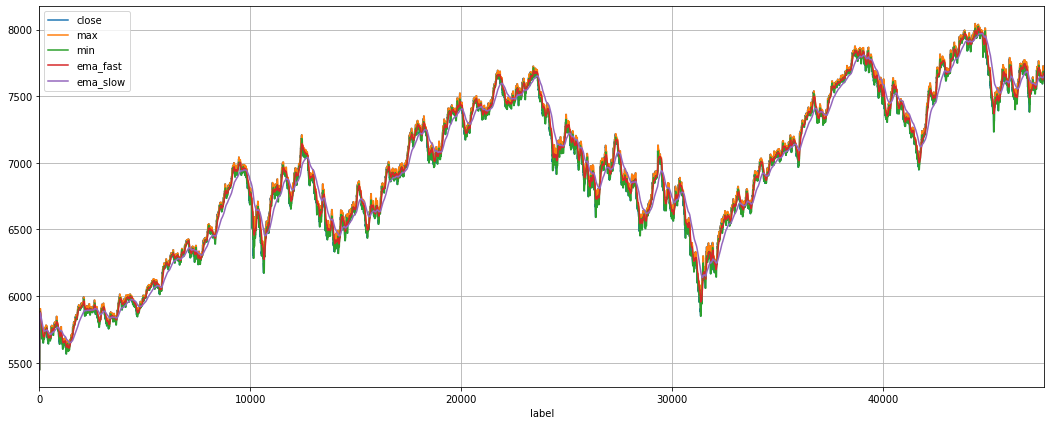

In [20]:
data.plot(figsize=(18,7), grid=True);

In [21]:
ema_diff = pd.DataFrame({'close': data['close'], 'ema_diff': data['ema_fast'] - data['ema_slow']})
ema_diff['return'] = ema_diff['close'].pct_change()
ema_diff['std'] = ema_diff['return'].expanding().std()
ema_diff['price_std'] = ema_diff['std'] * ema_diff['close']
ema_diff['norm'] = ema_diff['ema_diff']/ema_diff['price_std']
ema_diff['zscore'] = (ema_diff['ema_diff'] - ema_diff['ema_diff'].expanding().mean()) / ema_diff['ema_diff'].expanding().std()
#ema_diff['max']

In [22]:
ema_diff.tail()

,close,ema_diff,return,std,price_std,norm,zscore
label,,,,,,,
47617,7699.375874,22.814065,0.000584,0.001096,8.440817,2.702827,0.212039
47618,7700.770525,23.361605,0.000181,0.001096,8.442260,2.767222,0.219793
47619,7700.715779,23.889883,-0.000007,0.001096,8.442111,2.829847,0.227273
47620,7698.888550,24.363003,-0.000237,0.001096,8.440024,2.886604,0.233972
47621,7694.325471,24.726325,-0.000593,0.001096,8.434959,2.931410,0.239116


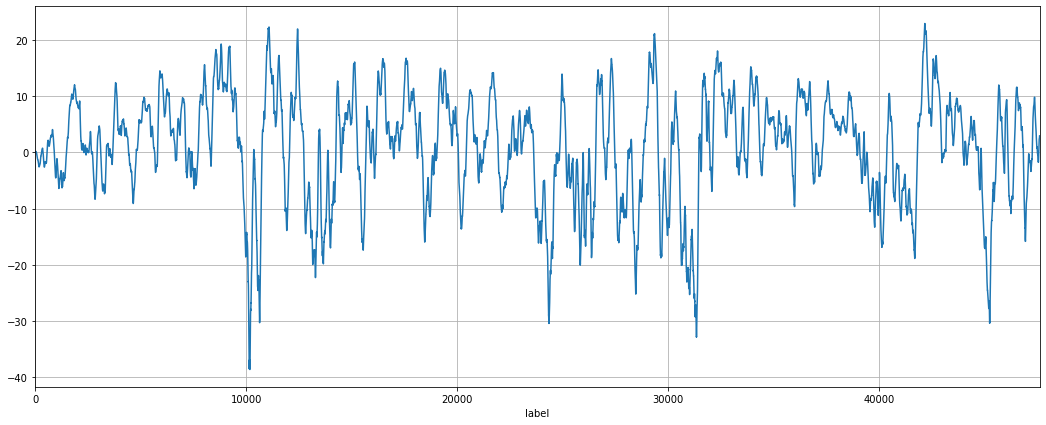

In [23]:
ema_diff['norm'].plot(figsize=(18,7), grid=True);

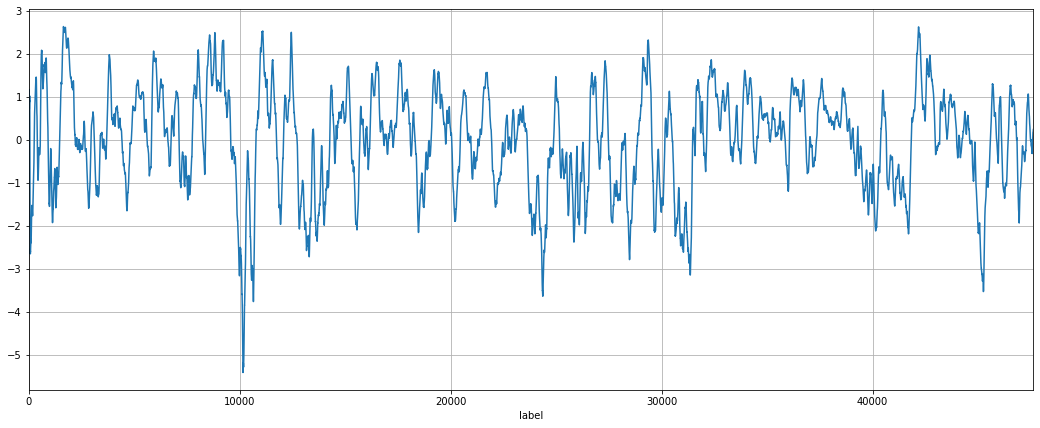

In [24]:
ema_diff['zscore'].plot(figsize=(18,7), grid=True);

In [25]:
def get_forecast(close, periods):
    ind = pd.DataFrame({'close': close})
    ind['max'] = ind.close.rolling(periods).max()
    ind['min'] = ind.close.rolling(periods).min()
    ind['mean'] = (ind['max'] + ind['min']) / 2
    ind['forecast'] = (ind['close'] - ind['mean']) / (ind['max'] - ind['min'])
    return ind

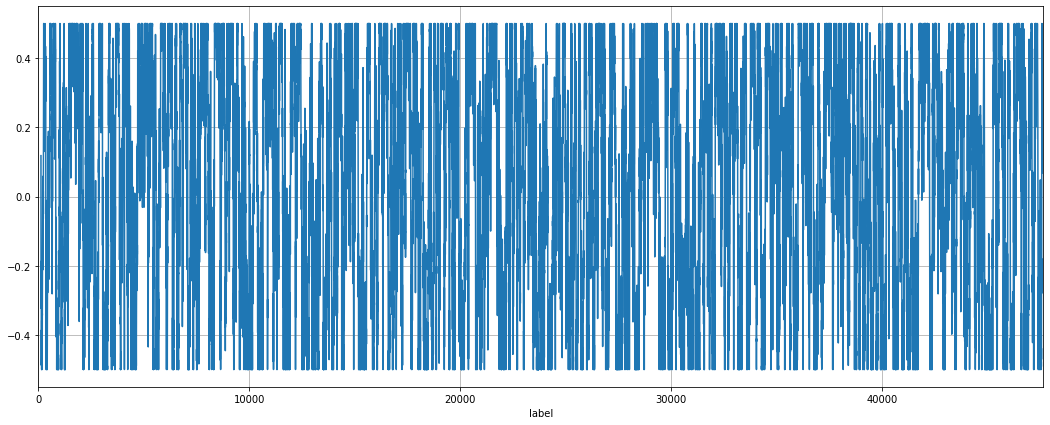

In [26]:
ind = get_forecast(data.close, 120)
ind.forecast.plot(figsize=(18,7), grid=True);

In [27]:
10 / ind.forecast.abs().mean()

33.22242042702403

In [28]:
10 / ema_diff.zscore.abs().mean()

10.73424327552716

In [29]:
10 / ema_diff.norm.abs().mean()

1.3256243248593607

In [30]:
ind['ind'] = ind['forecast'] * 40 + ema_diff['norm'] * 5.6

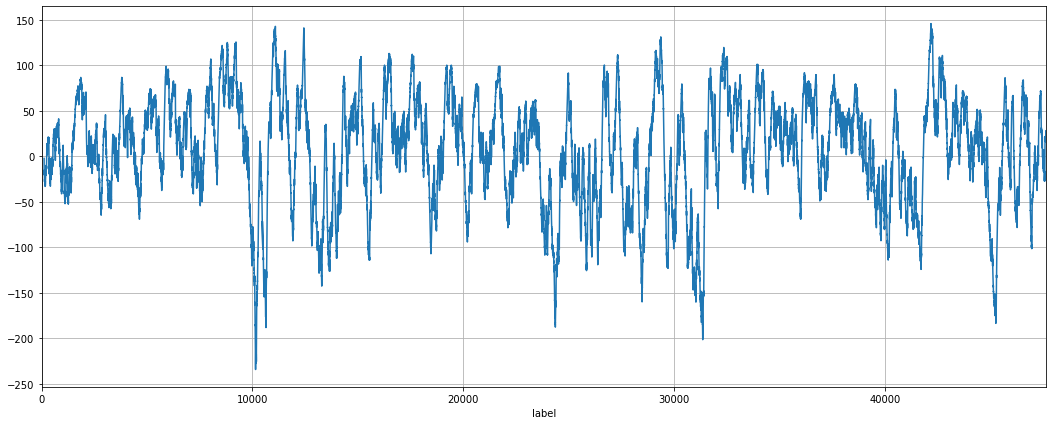

In [31]:
ind.ind.plot(figsize=(18, 7), grid=True);

In [32]:
norm_ind = pd.DataFrame({'breakout': ind['forecast'] * 40, 'ema_cross': ema_diff['norm'] * 5.6})
norm_ind['ema_cross'] = norm_ind['ema_cross'].clip(lower=-20, upper=20)
norm_ind['ema_cross_shift'] = norm_ind['ema_cross'].shift(20)
norm_ind.tail()

,breakout,ema_cross,ema_cross_shift
label,,,
47617,11.761055,15.135829,11.284993
47618,12.176250,15.496442,11.702197
47619,12.159952,15.847143,12.088917
47620,11.615975,16.164980,12.392413
47621,10.257521,16.415896,12.661011


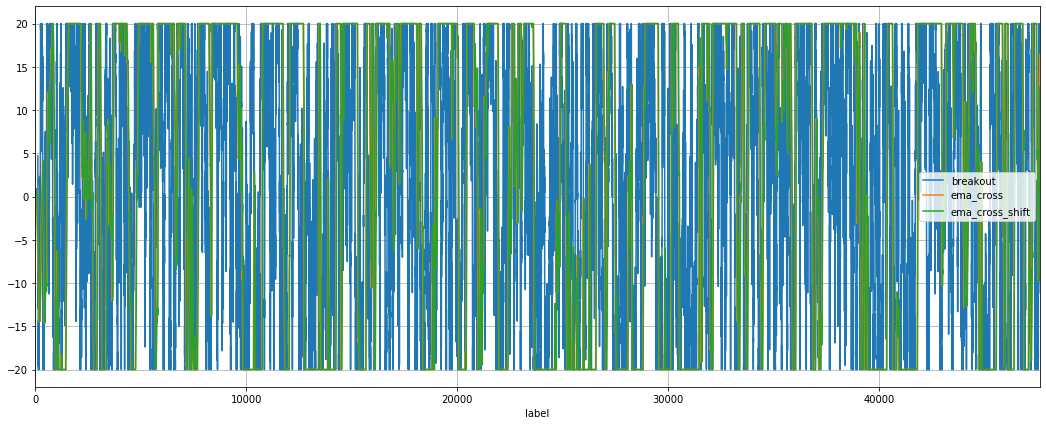

In [33]:
norm_ind.plot(figsize=(18,7), grid=True);

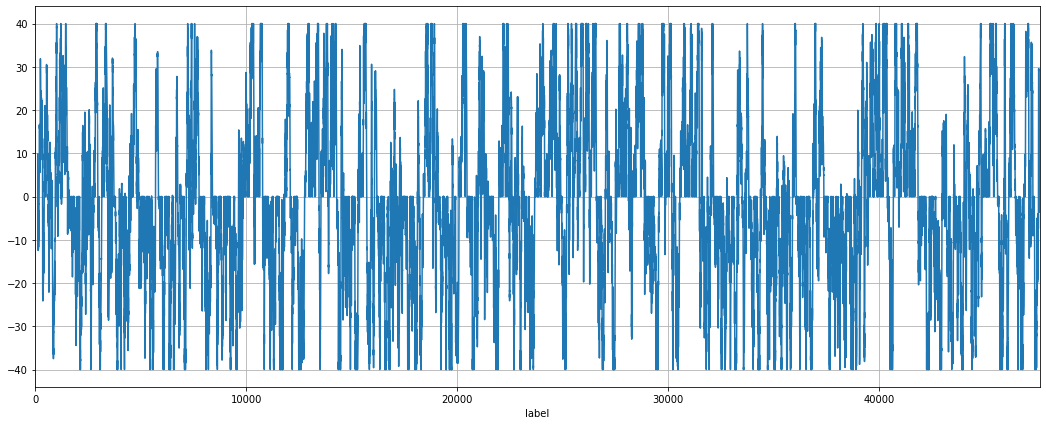

In [34]:
(norm_ind['breakout'] - norm_ind['ema_cross_shift']).plot(figsize=(18,7), grid=True);

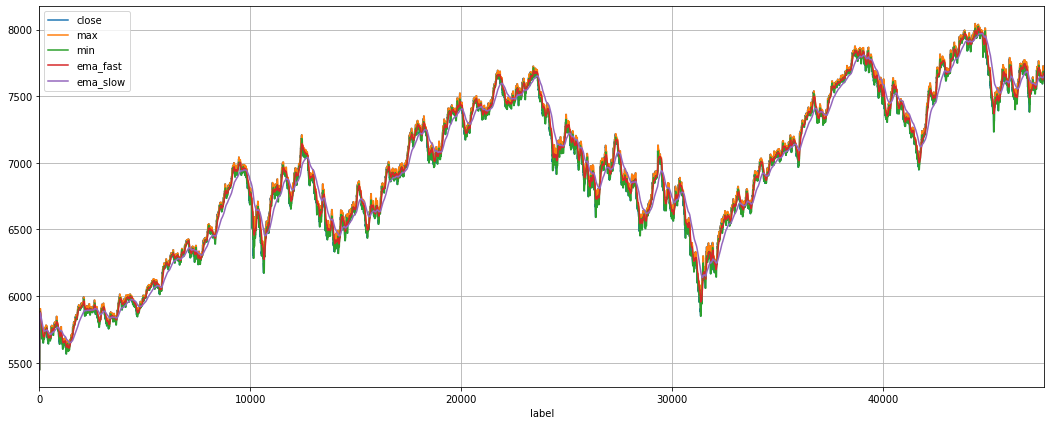

In [35]:
data.plot(figsize=(18,7), grid=True);

In [36]:
periods = [7, 15, 30, 120, 240, 480]

In [37]:
forecasts = pd.DataFrame()
for period in periods:
    forecasts[period] = get_forecast(data.close, period)['forecast']
forecasts.tail()

,7,15,30,120,240,480
label,,,,,,
47617,0.500000,0.500000,0.500000,0.294026,0.247204,0.235753
47618,0.500000,0.500000,0.500000,0.304406,0.264191,0.241399
47619,0.496989,0.498272,0.498272,0.303999,0.263804,0.241177
47620,0.396507,0.433931,0.440612,0.290399,0.256851,0.233781
47621,0.028050,0.251384,0.296617,0.256438,0.256438,0.215311


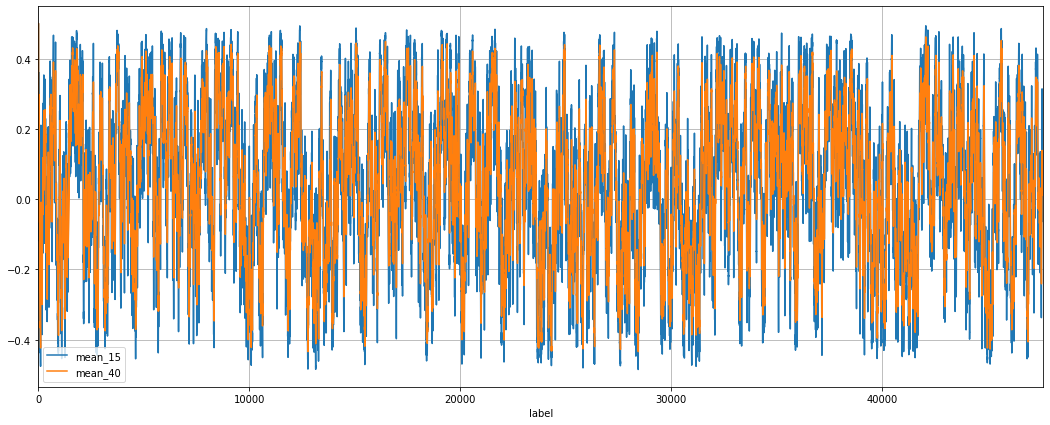

In [38]:
x = pd.DataFrame({'mean_15': forecasts.mean(axis=1).ewm(span=15).mean(),
                  'mean_40': forecasts.mean(axis=1).ewm(span=40).mean()
                  #'forecast': forecasts.mean(axis=1)
                 })
x.plot(figsize=(18,7),grid=True);

In [39]:
forecasts.corr()

,7,15,30,120,240,480
7,1.000000,0.810096,0.622563,0.348871,0.260443,0.200901
15,0.810096,1.000000,0.848737,0.507183,0.383455,0.294333
30,0.622563,0.848737,1.000000,0.677216,0.520212,0.397249
120,0.348871,0.507183,0.677216,1.000000,0.858879,0.684764
240,0.260443,0.383455,0.520212,0.858879,1.000000,0.874950
480,0.200901,0.294333,0.397249,0.684764,0.874950,1.000000


In [40]:
def get_emas(close, periods):
    ind = pd.DataFrame({'close': close})
    ind['ema_fast'] = close.ewm(span=periods[0]).mean()
    ind['ema_slow'] = close.ewm(span=periods[1]).mean()
    ind['diff'] = ind['ema_fast'] - ind['ema_slow']
    return ind

In [41]:
ema_pairs = [(60, 240), (120, 640), (360, 1120)]

In [42]:
emas = pd.DataFrame()
for pair in ema_pairs:
    emas[pair] = get_emas(data.close, pair)['diff']
emas.tail()

,"(60, 240)","(120, 640)","(360, 1120)"
label,,,
47617,18.005577,21.428994,16.668415
47618,18.490532,21.866052,16.823600
47619,18.949324,22.292682,16.977278
47620,19.339488,22.685301,17.122800
47621,19.596726,23.007870,17.249950


In [43]:
emas.corr()

,"(60, 240)","(120, 640)","(360, 1120)"
"(60, 240)",1.000000,0.806667,0.436479
"(120, 640)",0.806667,1.000000,0.836758
"(360, 1120)",0.436479,0.836758,1.000000


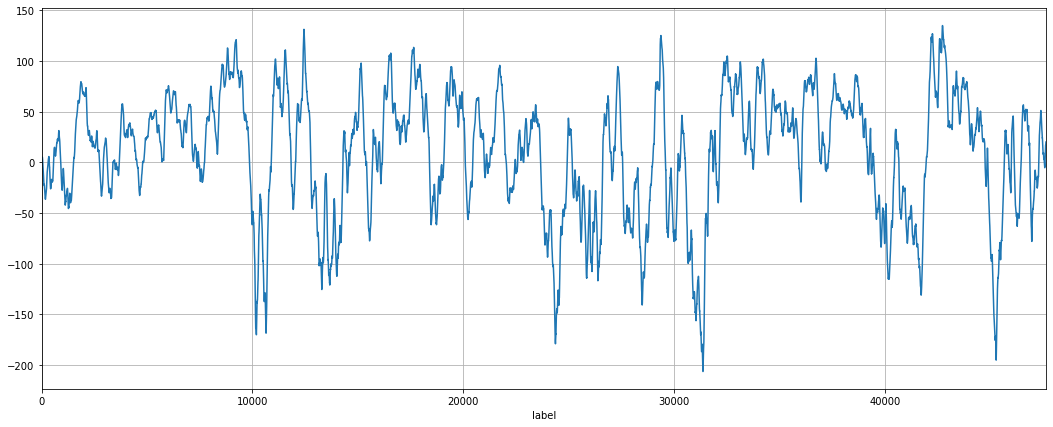

In [44]:
emas.mean(axis=1).plot(figsize=(18,7), grid=True);

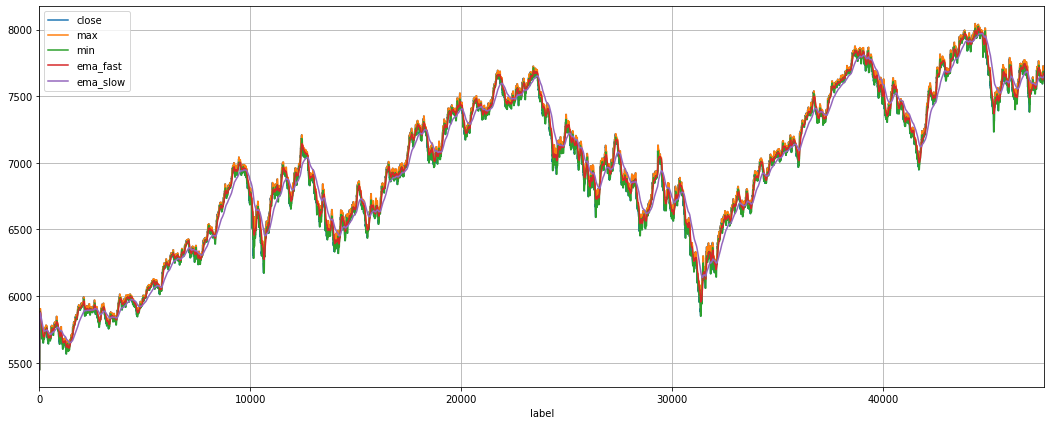

In [45]:
data.plot(figsize=(18,7), grid=True);

In [46]:
10/ emas.mean(axis=1).abs().mean()

0.1993018810626806

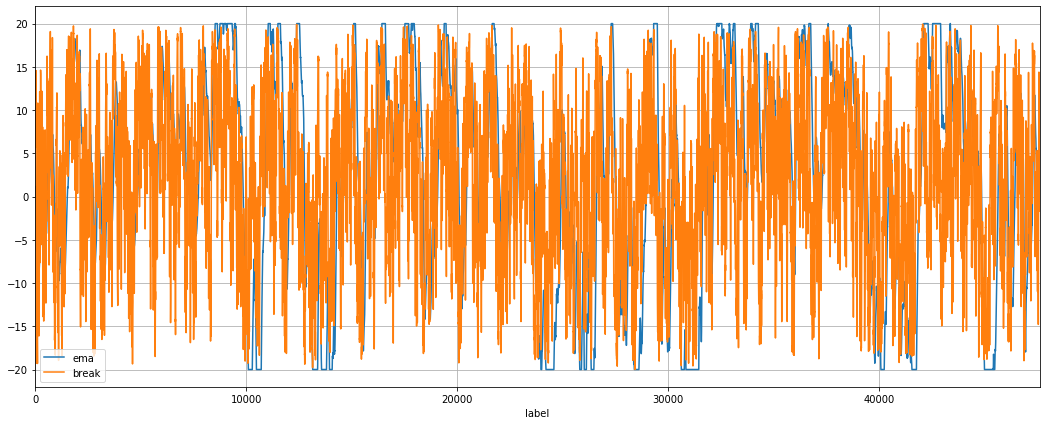

In [47]:
indices = pd.DataFrame({'ema': (emas.mean(axis=1) * .23).clip(lower=-20, upper=20),
                       'break': forecasts.mean(axis=1).rolling(15).mean() * 40
                       })
indices.plot(figsize=(18,7), grid=True);

In [48]:
indices.corr()

,ema,break
ema,1.000000,0.446864
break,0.446864,1.000000


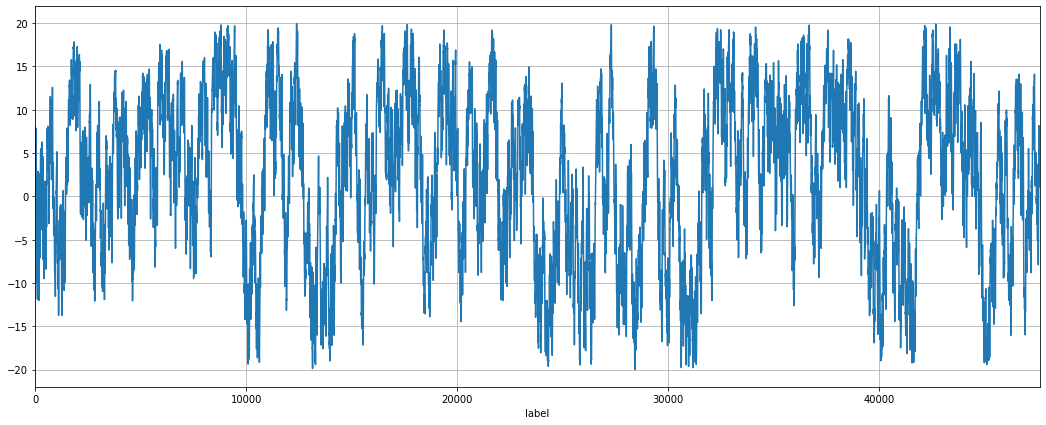

In [49]:
indices.mean(axis=1).plot(figsize=(18,7), grid=True);

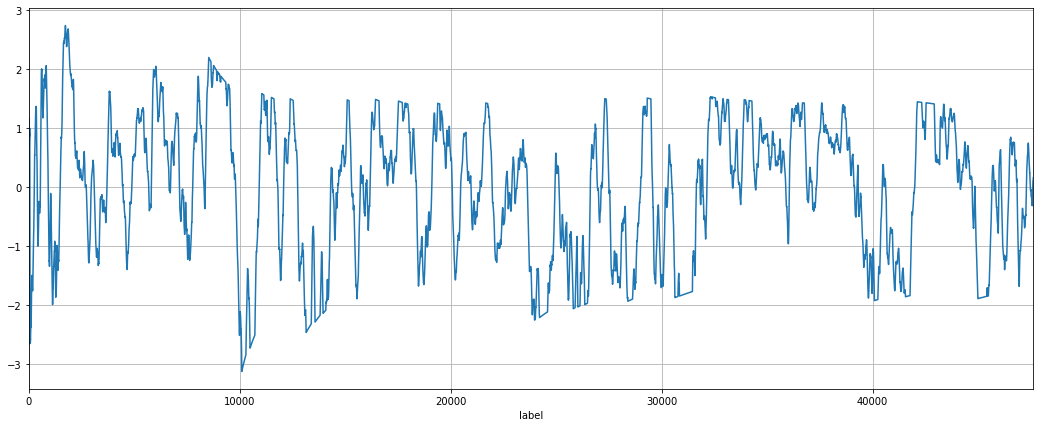

In [50]:
((indices['ema'] - indices['ema'].expanding().mean()) / indices['ema'].expanding().std()).plot(figsize=(18,7), grid=True);

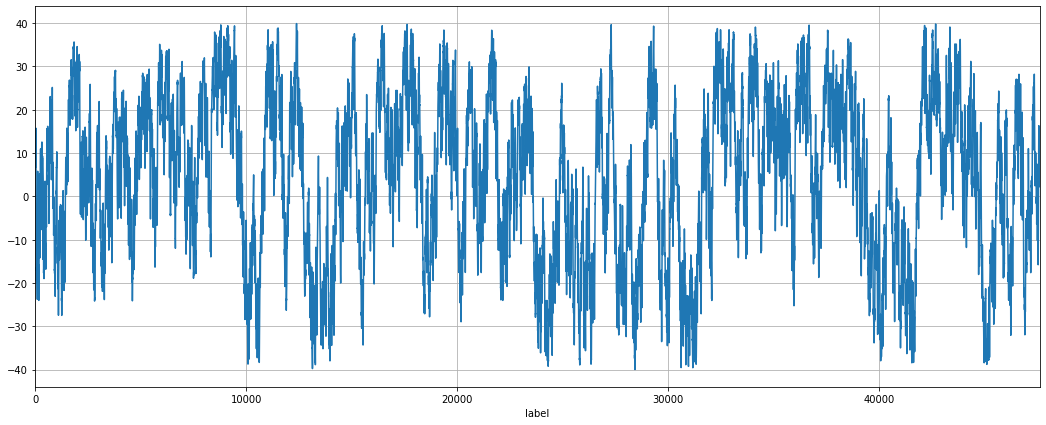

In [51]:
(indices['ema'] + indices['break']).plot(figsize=(18,7), grid=True);

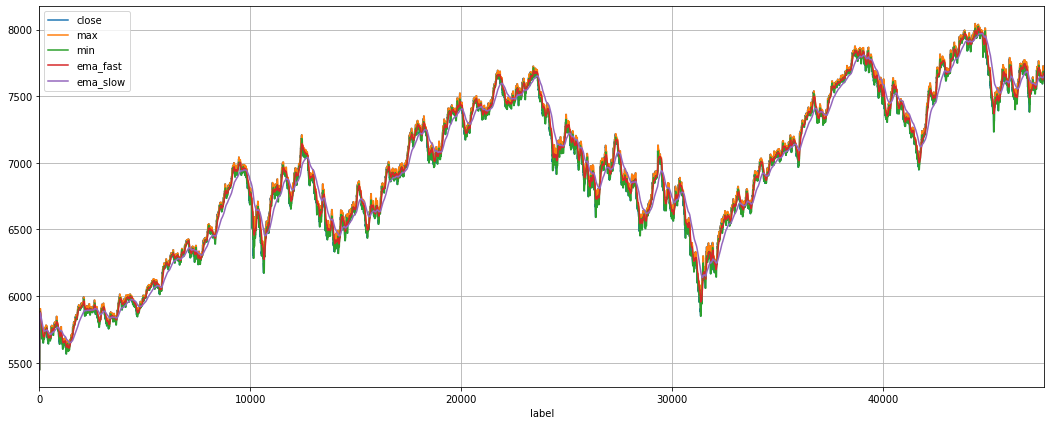

In [52]:
data.plot(figsize=(18,7), grid=True);

In [53]:
def get_ATR(data, periods):
    TR = pd.DataFrame({'A': (data['high'] - data['low']),
                       'B': (data['high'] - data['close']).abs(),
                       'C': (data['low'] - data['close']).abs()
                      })
    TR['TR'] = TR.max(axis=1)
    TR['ATR'] = TR['TR'].rolling(periods).mean()
    return TR.ATR

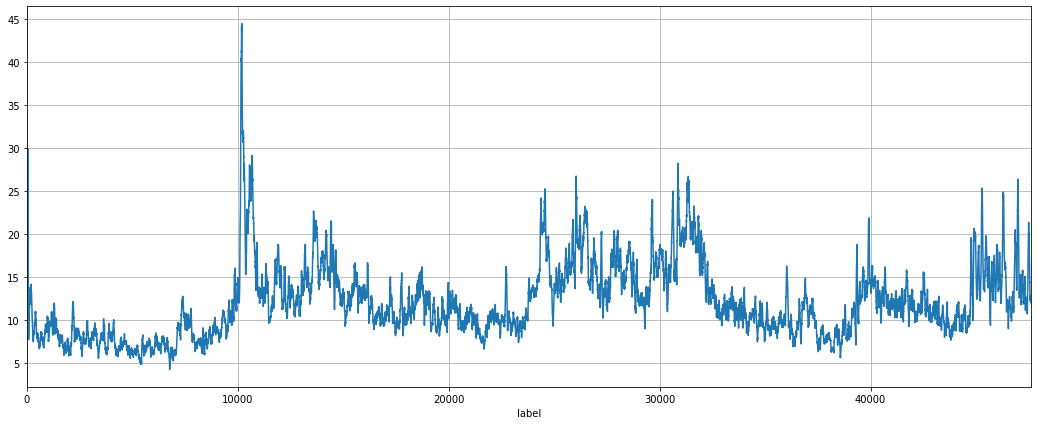

In [54]:
get_ATR(vol_candles, 60).plot(figsize=(18,7), grid=True);

In [55]:
def get_std(data, periods):
    returns = np.log(data.avg_price.pct_change()+1)
    return returns.rolling(periods).std() * data.avg_price

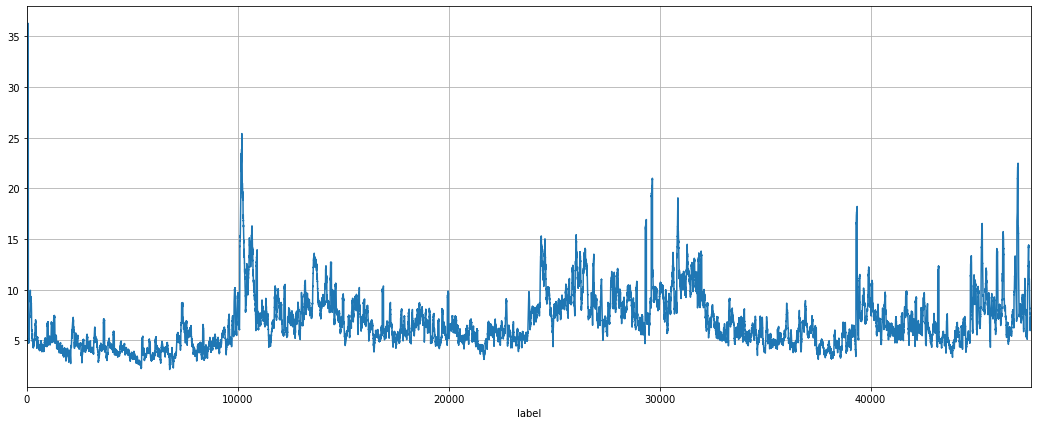

In [56]:
get_std(vol_candles, 60).plot(figsize=(18,7), grid=True);

In [57]:
vol_indicators = pd.DataFrame({'ATR': get_ATR(vol_candles, 80), 
                               'std': get_std(vol_candles, 80)})

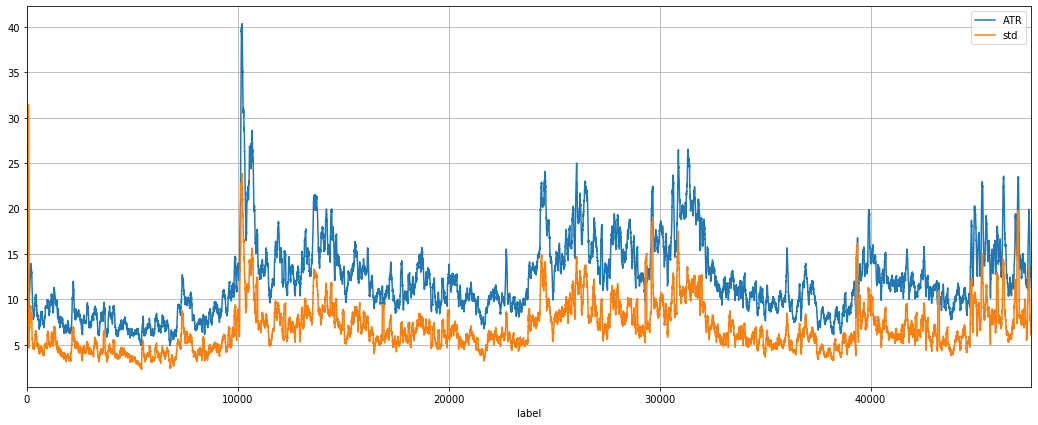

In [58]:
vol_indicators.plot(figsize=(18,7), grid=True);

In [59]:
vol_indicators.corr()

,ATR,std
ATR,1.000000,0.940434
std,0.940434,1.000000


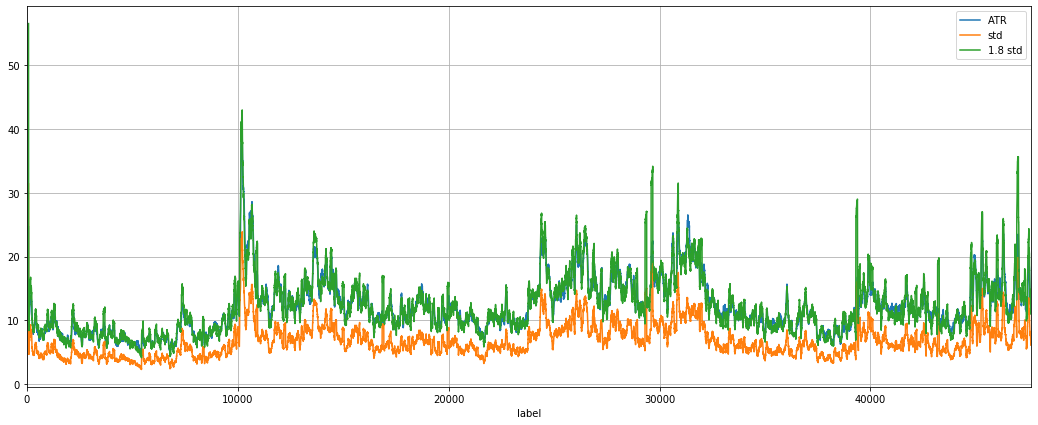

In [60]:
vol_indicators['1.8 std'] = vol_indicators['std'] * 1.8
vol_indicators.plot(figsize=(18,7), grid=True);

In [61]:
vol_indicators.corr()

,ATR,std,1.8 std
ATR,1.000000,0.940434,0.940434
std,0.940434,1.000000,1.000000
1.8 std,0.940434,1.000000,1.000000


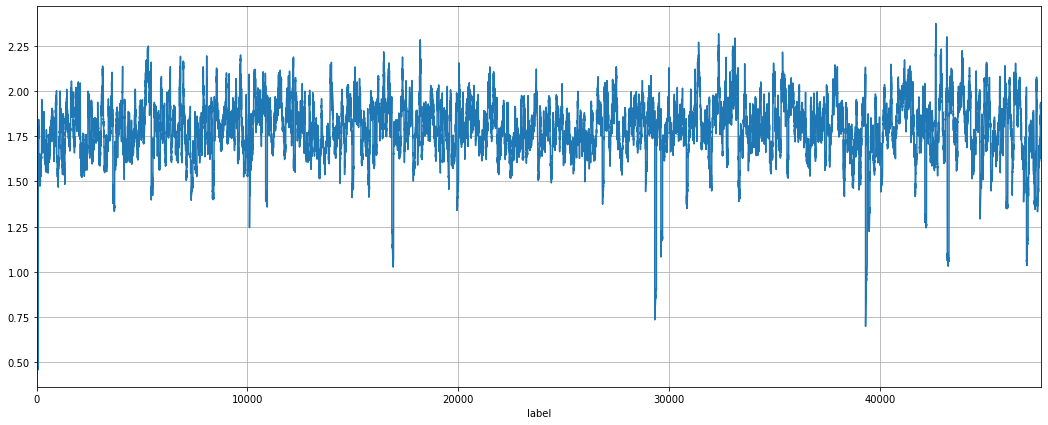

In [62]:
(vol_indicators['ATR'] / vol_indicators['std']).plot(figsize=(18,7), grid=True);

In [63]:
periods = [10, 20, 40, 80, 160]

In [64]:
multi_period = pd.DataFrame({'close': data.close})

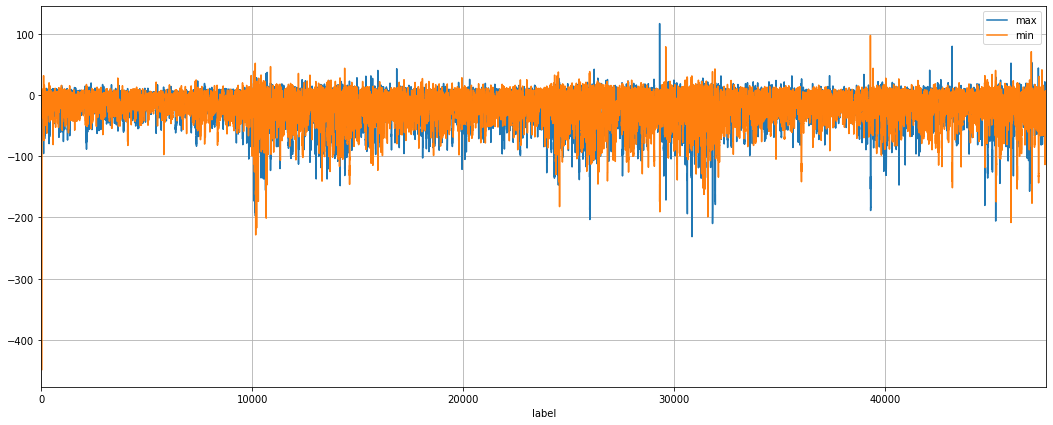

In [65]:
multi_period['max'] = multi_period.close - multi_period.close.shift(1).rolling(20).max()
multi_period['min'] = multi_period.close.shift(1).rolling(20).min() - multi_period.close
multi_period[['max', 'min']].plot(figsize=(18,7), grid=True);

In [66]:
multi_period_max = pd.DataFrame({'close': data.close})
multi_period_min = pd.DataFrame({'close': data.close})
for period in periods:
    multi_period_max[period] = multi_period.close - multi_period.close.shift(1).rolling(period).max()
    multi_period_min[period] = multi_period.close.shift(1).rolling(20).min() - multi_period.close
multi_period_avg = pd.DataFrame({
    #'close': data.close,
    'max': multi_period_max.mean(axis=1).clip(upper=2200, lower=800),
    'min': multi_period_min.mean(axis=1).clip(upper=2200, lower=800),
})
multi_period_avg.tail()

,max,min
label,,
47617,1270.831077,1257.983758
47618,1270.786561,1257.053991
47619,1270.266933,1257.090488
47620,1268.439703,1258.308641
47621,1264.836563,1261.350694


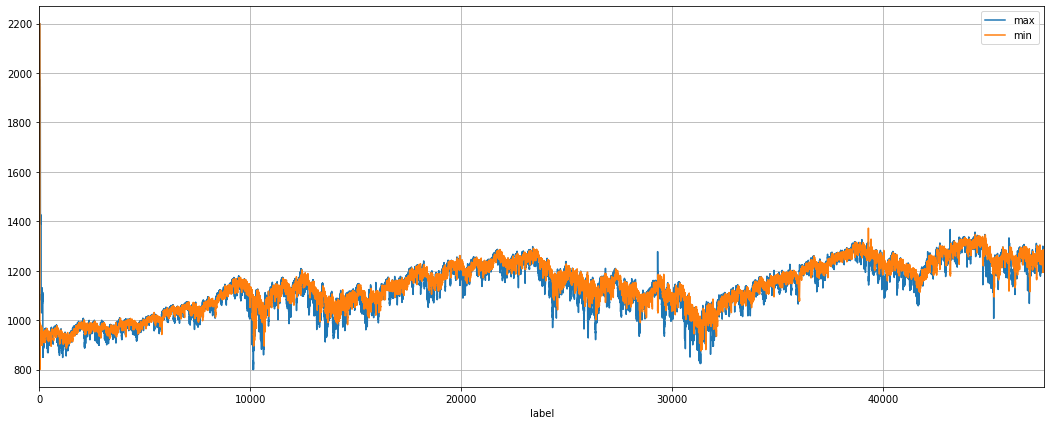

In [67]:
multi_period_avg.plot(figsize=(18,7), grid=True);

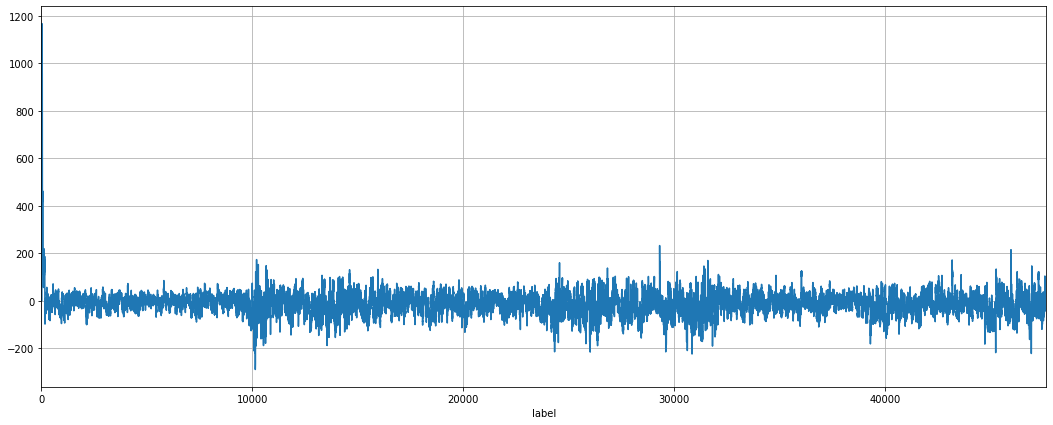

In [68]:
(multi_period_avg['max'] - multi_period_avg['min']).plot(figsize=(18,7), grid=True);

In [69]:
from functools import partial

def get_min_max(data, period):
    return pd.DataFrame({
        'max': (data - data.shift(1).rolling(period).max()) > 0,
        'min': (data.shift(1).rolling(period).min() - data) > 0
    })

def majority_function(data):
    return (0.5 + ((data.sum(axis=1) - 0.5) / data.count(axis=1))).round(0)

def get_min_max_df(data, periods, func=get_min_max):
    min_max_func = partial(func, data)
    mins = pd.DataFrame()
    maxs = pd.DataFrame()
    for period in periods:
        df = min_max_func(period)
        mins[period] = df['min']
        maxs[period] = df['max']
    return {'min': mins,
           'max': maxs}

def get_signals(data, periods, func=get_min_max_df):
    min_max = func(data, periods)
    #return min_max['min']
    
    return pd.DataFrame({
        'signal': majority_function(min_max['max']) - majority_function(min_max['min'])
    })
    

In [70]:
get_signals(data.close, periods).tail()

,signal
label,
47617,1.0
47618,1.0
47619,0.0
47620,0.0
47621,0.0


In [71]:
signals = pd.DataFrame({
    'close': data.close,
    'signal': get_signals(data.close, periods)['signal']
})

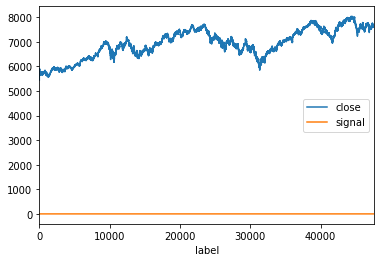

In [72]:
signals.plot();

In [73]:
signals['value'] = signals['close'] * signals['signal']

In [74]:
signals.tail()

,close,signal,value
label,,,
47617,7699.375874,1.0,7699.375874
47618,7700.770525,1.0,7700.770525
47619,7700.715779,0.0,0.000000
47620,7698.888550,0.0,0.000000
47621,7694.325471,0.0,0.000000


In [75]:
signals['value'] = signals.value.map(lambda x: x if x != 0 else np.nan)

In [76]:
signals['buy'] = signals['value'].map(lambda x: x if x > 0 else np.nan)
signals['sell'] = signals['value'].map(lambda x: -x if x < 0 else np.nan)

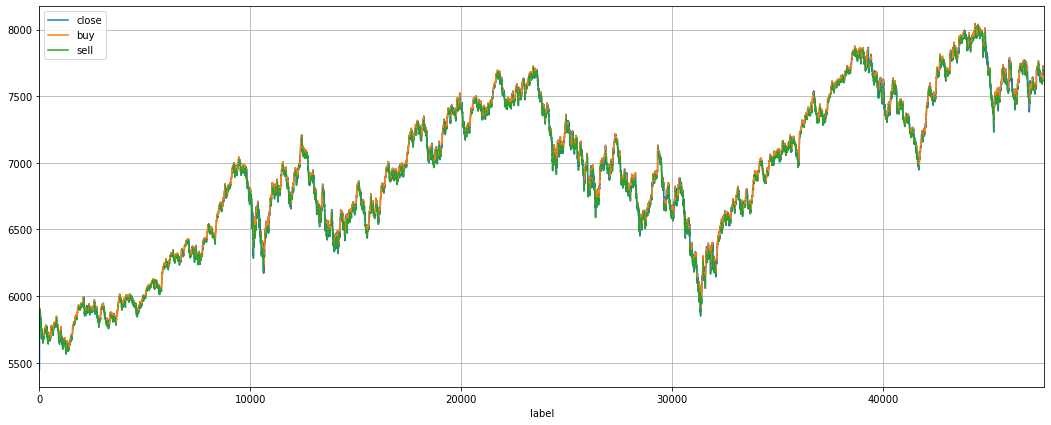

In [77]:
signals[['close', 'buy', 'sell']].plot(figsize=(18, 7), grid=True);

In [78]:
signals['cum_signal'] = signals.signal.expanding().apply(lambda x: x.sum().clip(min=-1, max=1), raw=False)

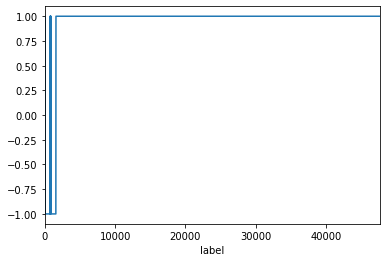

In [79]:
signals['cum_signal'].plot()

In [80]:
#signals['filter'] = np.sign(emas.mean(axis=1))
signals['filter'] = np.sign(data.close - data.ema_fast)
signals['atr'] = get_ATR(vol_candles, 80)

In [81]:
number_of_trades = 0
entry = 0
for row in signals.itertuples():
    if row.Index == 0:
        continue
    # if there's no position signal is to be filtered
    if signals.loc[row.Index-1, 'cum_signal'] == 0 and row.filter * row.signal != 1:
        signals.loc[row.Index, 'cum_signal'] = 0
        continue
    else:
        signals.loc[row.Index, 'cum_signal'] = (signals.loc[row.Index-1, 'cum_signal'] + row.signal).clip(max=1, min=-1)
        
    # create stop loss
    if signals.loc[row.Index, 'cum_signal'] - signals.loc[row.Index-1, 'cum_signal'] != 0:
        sl = signals.loc[row.Index, 'close'] - signals.loc[row.Index, 'cum_signal'] * signals.loc[row.Index, 'atr'] * 1
        signals.loc[row.Index, 'sl'] = sl
    if not signals.loc[row.Index, 'sl']:
        signals.loc[row.Index, 'sl'] = signals.loc[row.Index-1, 'sl']
        
    # apply stop loss
    if signals.loc[row.Index, 'cum_signal'] == 1 and signals.loc[row.Index, 'close'] < sl:
        signals.loc[row.Index, 'cum_signal'] = 0
    elif signals.loc[row.Index, 'cum_signal'] == -1 and signals.loc[row.Index, 'close'] > sl:
        signals.loc[row.Index, 'cum_signal'] = 0
        
    # count trades
    if signals.loc[row.Index, 'cum_signal'] != signals.loc[row.Index-1, 'cum_signal']:
        number_of_trades += 1

In [82]:
signals.tail()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl
label,,,,,,,,,
47617,7699.375874,1.0,7699.375874,7699.375874,NaN,1.0,1.0,11.640625,NaN
47618,7700.770525,1.0,7700.770525,7700.770525,NaN,1.0,1.0,11.581250,NaN
47619,7700.715779,0.0,NaN,NaN,NaN,1.0,1.0,11.421875,NaN
47620,7698.888550,0.0,NaN,NaN,NaN,1.0,1.0,11.431250,NaN
47621,7694.325471,0.0,NaN,NaN,NaN,1.0,1.0,11.356250,NaN


In [83]:
signals['value'] = signals['close'] * signals['cum_signal']
signals['value'] = signals.value.map(lambda x: x if x != 0 else np.nan)
signals['long'] = signals['value'].map(lambda x: x if x > 0 else np.nan)
signals['short'] = signals['value'].map(lambda x: -x if x < 0 else np.nan)

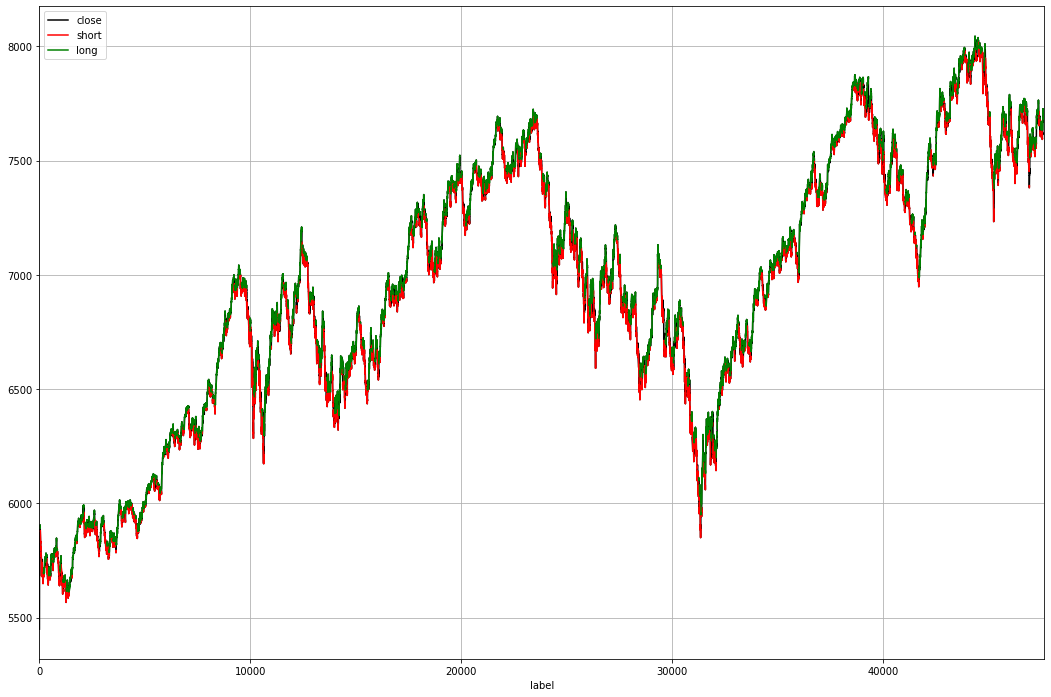

In [84]:
signals[['close', 'short', 'long']].plot(figsize=(18, 12), grid=True, color=['k', 'r', 'g']);

In [85]:
#signals.tail(200)

In [86]:
signals.head()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl,long,short
label,,,,,,,,,,,
0,5449.665624,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,5674.427844,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
2,5800.936238,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
3,5880.021018,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
4,5880.899496,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN


In [87]:
signals['long_pnl'] = signals.long.diff().fillna(0)
signals['short_pnl'] = - signals.short.diff().fillna(0)

In [88]:
long_pnl = signals.long_pnl.sum()
short_pnl = signals.short_pnl.sum()
pnl = long_pnl + short_pnl
long_pnl, short_pnl, pnl

(15981.027821490128, 14729.693598734975, 30710.721420225105)

fast filter: 773 (980 with 60minute volumes)
slow filter: 404

In [89]:
signals['pnl'] = signals['long_pnl'] + signals['short_pnl']
pnl_p = signals[signals['pnl']>0].pnl
pnl_m = signals[signals['pnl']<0].pnl
pnl_p.count(), pnl_m.count(), pnl_p.count()/(pnl_p.count()+pnl_m.count())

(17510, 14136, 0.5533084750047399)

In [90]:
pnl_p.sum(), pnl_m.sum(), pnl_p.sum()/ pnl_m.abs().sum()

(96431.30586366841, -65720.58444344331, 1.4672922750200679)

In [91]:
signals['date'] = vol_candles['date']

In [92]:
signals.set_index('date', inplace=True)

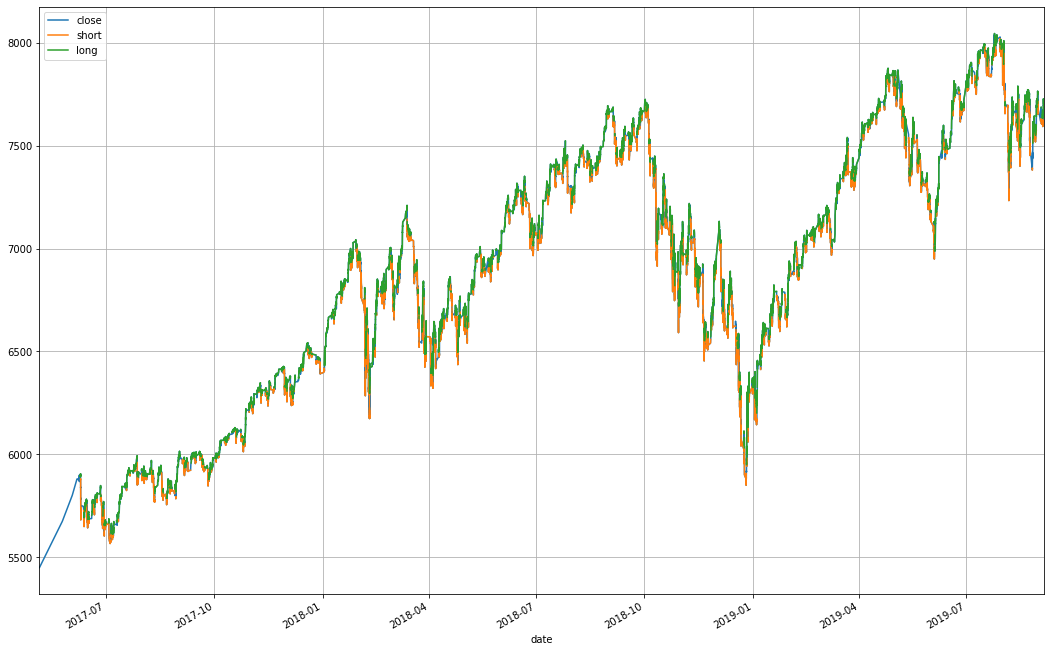

In [93]:
signals[['close', 'short', 'long']].plot(figsize=(18, 12), grid=True);

In [94]:
signals.tail(30)

,close,signal,value,buy,sell,cum_signal,filter,atr,sl,long,short,long_pnl,short_pnl,pnl
date,,,,,,,,,,,,,,
2019-09-04 15:29:00,7686.908521,-1.0,NaN,NaN,7686.908521,0.0,1.0,12.850000,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:31:00,7687.661498,0.0,NaN,NaN,NaN,0.0,1.0,12.734375,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:33:00,7684.307577,-1.0,NaN,NaN,7684.307577,0.0,1.0,12.621875,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:36:00,7691.268868,0.0,NaN,NaN,NaN,0.0,1.0,12.615625,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:40:00,7690.154045,0.0,NaN,NaN,NaN,0.0,1.0,12.578125,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:43:00,7695.233851,0.0,NaN,NaN,NaN,0.0,1.0,12.550000,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:45:00,7694.463233,0.0,NaN,NaN,NaN,0.0,1.0,12.496875,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:49:00,7693.119692,0.0,NaN,NaN,NaN,0.0,1.0,12.543750,NaN,NaN,NaN,0.000000,-0.0,0.000000
2019-09-04 15:53:00,7687.393574,0.0,NaN,NaN,NaN,0.0,1.0,12.506250,NaN,NaN,NaN,0.000000,-0.0,0.000000


In [95]:
interval = pd.Series(signals.index).diff().loc[10:]
interval.tail(20)

47602   00:06:00
47603   00:02:00
47604   00:04:00
47605   00:03:00
47606   00:05:00
47607   00:06:00
47608   00:07:00
47609   00:06:00
47610   00:08:00
47611   00:08:00
47612   00:07:00
47613   00:10:00
47614   00:09:00
47615   00:08:00
47616   00:05:00
47617   00:08:00
47618   00:11:00
47619   00:13:00
47620   00:11:00
47621   00:15:00
Name: date, dtype: timedelta64[ns]

In [96]:
interval.mean()

Timedelta('0 days 00:24:44.596740')

In [97]:
daily = pd.DataFrame()
daily['close'] = signals['close'].resample('D').last()
daily['pnl'] = (signals['long_pnl'] + signals['short_pnl']).resample('D').sum()
daily.tail()

,close,pnl
date,,
2019-08-31,NaN,0.000000
2019-09-01,NaN,0.000000
2019-09-02,7621.254988,-21.201584
2019-09-03,7614.897838,-31.986230
2019-09-04,7694.325471,79.952737


In [98]:
daily['dollars'] = 0
daily.iloc[0,2] = 25000

In [99]:
daily.head()

,close,pnl,dollars
date,,,
2017-05-05,5449.665624,0.0,25000
2017-05-06,NaN,0.0,0
2017-05-07,NaN,0.0,0
2017-05-08,NaN,0.0,0
2017-05-09,NaN,0.0,0


In [100]:
multiplier = 20

In [101]:
daily['dollars'] = 25000 + daily.pnl.cumsum() * multiplier

In [102]:
daily.tail()

,close,pnl,dollars
date,,,
2019-08-31,NaN,0.000000,638679.129934
2019-09-01,NaN,0.000000,638679.129934
2019-09-02,7621.254988,-21.201584,638255.098262
2019-09-03,7614.897838,-31.986230,637615.373659
2019-09-04,7694.325471,79.952737,639214.428405


In [103]:
daily['return'] = daily.dollars.pct_change()

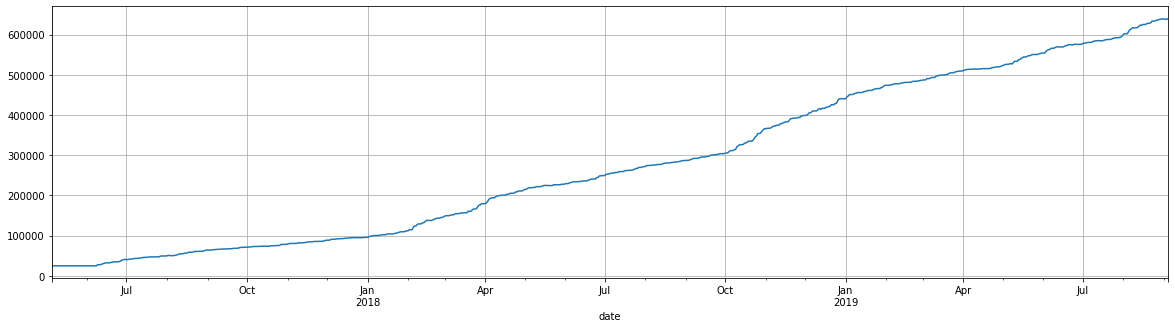

In [104]:
daily.dollars.plot(figsize=(20,5), grid=True);

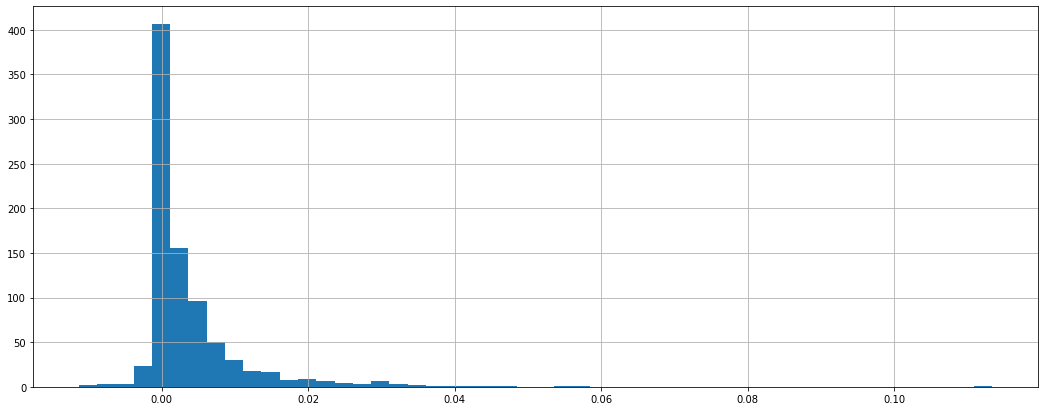

In [105]:
daily['return'].hist(bins=50,figsize=(18,7), grid=True);

In [106]:
daily['dollars_diff'] = daily.dollars.diff()
daily.tail()

,close,pnl,dollars,return,dollars_diff
date,,,,,
2019-08-31,NaN,0.000000,638679.129934,0.000000,0.000000
2019-09-01,NaN,0.000000,638679.129934,0.000000,0.000000
2019-09-02,7621.254988,-21.201584,638255.098262,-0.000664,-424.031672
2019-09-03,7614.897838,-31.986230,637615.373659,-0.001002,-639.724603
2019-09-04,7694.325471,79.952737,639214.428405,0.002508,1599.054745


In [107]:
daily['dollars_diff'].sort_values(ascending=True).head(20)

date
2018-12-13   -1940.895653
2019-05-08   -1229.080030
2018-11-01    -991.623215
2018-03-20    -942.550971
2019-06-27    -757.493416
2019-08-15    -700.524570
2018-05-08    -647.416738
2019-09-03    -639.724603
2017-09-28    -596.030160
2019-07-15    -592.133420
2019-04-11    -585.819606
2018-04-16    -581.606809
2019-06-13    -523.811703
2019-02-06    -497.344002
2017-08-03    -473.854903
2018-05-18    -463.844926
2017-06-30    -463.620052
2017-08-23    -459.862687
2019-06-19    -458.095471
2018-11-08    -436.175407
Name: dollars_diff, dtype: float64

In [108]:
daily['dollars_diff'].sort_values(ascending=False).head(20)

date
2018-12-26    6901.740081
2018-10-10    6889.680983
2018-02-05    6261.376772
2018-10-26    5958.629432
2018-10-24    5182.112160
2019-08-05    5092.096079
2018-10-29    4870.184909
2018-03-26    4861.919196
2019-01-02    4750.026653
2018-04-04    4639.272620
2019-08-06    4613.726116
2018-03-27    4356.006782
2018-11-20    4259.763321
2018-10-23    4243.201419
2019-08-01    4182.339257
2018-04-03    4098.332155
2018-12-27    4097.881238
2018-03-19    4069.643289
2018-12-04    4055.487158
2018-12-21    4029.697363
Name: dollars_diff, dtype: float64

In [109]:
small = 0
big = []
for i in daily[daily['dollars_diff'] < 0].reset_index().date.diff().eq(pd.Timedelta('1 D')).iteritems():
    if i[1]:
        small += 1
    else:
        if small > 0:
            big.append(small)
            small = 0
print(big)

[1, 1, 1, 2, 1]


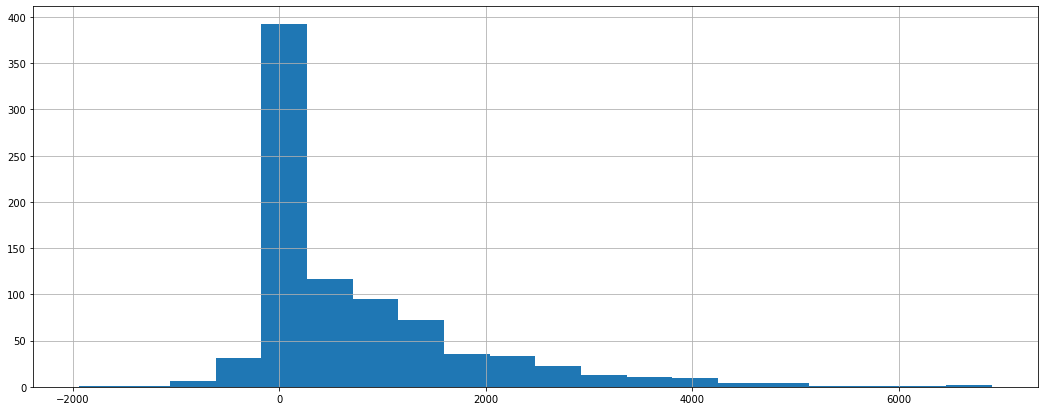

In [110]:
daily['dollars_diff'].hist(bins=20,figsize=(18,7), grid=True);

In [111]:
daily.tail()

,close,pnl,dollars,return,dollars_diff
date,,,,,
2019-08-31,NaN,0.000000,638679.129934,0.000000,0.000000
2019-09-01,NaN,0.000000,638679.129934,0.000000,0.000000
2019-09-02,7621.254988,-21.201584,638255.098262,-0.000664,-424.031672
2019-09-03,7614.897838,-31.986230,637615.373659,-0.001002,-639.724603
2019-09-04,7694.325471,79.952737,639214.428405,0.002508,1599.054745


In [112]:
from pyfolio.timeseries import perf_stats

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [113]:
perf_stats(daily['return'])

Annual return            1.605408
Cumulative returns      24.568577
Annual volatility        0.128484
Sharpe ratio             7.538201
Calmar ratio           134.264383
Stability                0.946247
Max drawdown            -0.011957
Omega ratio             23.523223
Sortino ratio           69.008683
Skew                          NaN
Kurtosis                      NaN
Tail ratio              17.988164
Daily value at risk     -0.012344
dtype: float64

In [114]:
(daily['return'] + 1).product()

25.568577136180128

In [115]:
number_of_trades

4693

In [116]:
spread = .25 * multiplier
commission = 1.18 + .85 
cost_of_trades = number_of_trades * (spread + commission)
cost_of_trades

32991.78999999999

In [117]:
days = (daily.index[-1] - daily.index[0]).days #pd.to_datetime('20190613')).days
days

852

In [118]:
trades_per_day = number_of_trades / days
trades_per_day

5.508215962441315

In [119]:
pnl_in_dollars = pnl*multiplier

In [120]:
cost_of_trades / (pnl_in_dollars)

0.053713798429809355

In [121]:
mean = daily['return'].mean() * 252
std = daily['return'].std() * (252**.5)
mean, std

(0.9685415202530709, 0.12848444544202028)

In [122]:
mean/std

7.538200573003475

In [123]:
#daily.to_pickle('cl_return.pickle')